## Problem Statement

#### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

### Hierarchical Clustering 

#### Import all the required libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_crime = pd.read_csv("crime_data.csv")
df_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Scaling

In [4]:
# Normalization function
def norm_func(i):
    x = (i - i.min())/(i.max() - i.min())
    return x

In [5]:
# Normalized data frame 
df_norm = norm_func(df_crime.iloc[:,1:])

In [6]:
df_norm.iloc[:,:].head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


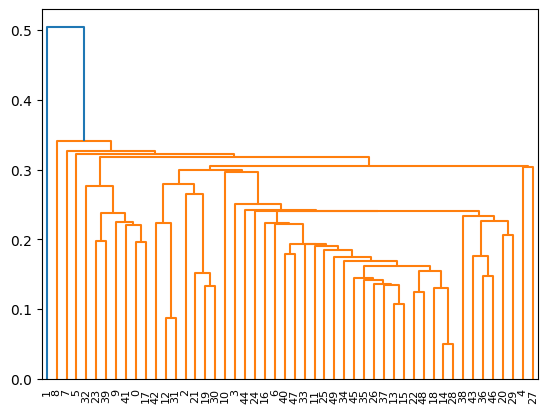

In [7]:
#create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))

In [8]:
??AgglomerativeClustring

Object `AgglomerativeClustring` not found.


In [9]:
#create clusters
crimehc = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage = 'single')

In [10]:
crime_hc=crimehc.fit_predict(df_norm)

In [11]:
df_crime['h_clusterid'] = crime_hc
df_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [12]:
df_crime.groupby(["h_clusterid"])["Unnamed: 0"].apply(lambda x:tuple(x))

h_clusterid
0    (Alabama, Arizona, Arkansas, California, Conne...
1                                          (Delaware,)
2                                           (Florida,)
3                                            (Alaska,)
4                                          (Colorado,)
Name: Unnamed: 0, dtype: object

## K Means Clustring

In [13]:
df_crime = pd.read_csv("crime_data.csv")
df_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [14]:
df_norm = norm_func(df_crime.iloc[:,1:])

In [15]:
model_kmeans = KMeans(n_clusters = 5)
crime_scaled = model_kmeans.fit(df_norm)

In [16]:
model_kmeans.labels_

array([1, 1, 3, 0, 3, 3, 4, 0, 3, 1, 4, 2, 3, 0, 2, 0, 0, 1, 2, 3, 4, 3,
       2, 1, 0, 0, 0, 3, 2, 4, 3, 3, 1, 2, 0, 0, 0, 0, 4, 1, 2, 1, 3, 4,
       2, 0, 4, 2, 2, 0])

In [17]:
md  = pd.Series(model_kmeans.labels_)

In [18]:
df_crime["labels"]=pd.Series(model_kmeans.labels_)
df_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3


In [19]:
df_crime.groupby(["labels"])["Unnamed: 0"].apply(lambda x:tuple(x))

labels
0    (Arkansas, Delaware, Indiana, Kansas, Kentucky...
1    (Alabama, Alaska, Georgia, Louisiana, Mississi...
2    (Idaho, Iowa, Maine, Minnesota, New Hampshire,...
3    (Arizona, California, Colorado, Florida, Illin...
4    (Connecticut, Hawaii, Massachusetts, New Jerse...
Name: Unnamed: 0, dtype: object

In [20]:
model_kmeans.cluster_centers_

array([[0.37048193, 0.33683953, 0.54116223, 0.3163529 ],
       [0.80045181, 0.7114726 , 0.36440678, 0.44541344],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.6177437 , 0.75031133, 0.798151  , 0.65421658],
       [0.21858864, 0.28767123, 0.84745763, 0.26836471]])

### Inferences 

In [21]:
df_crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'labels'], dtype='object')

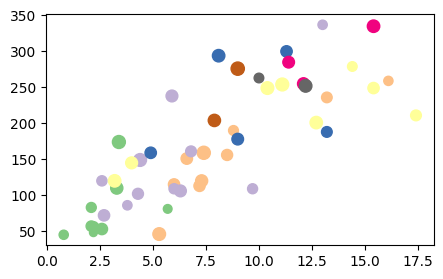

In [22]:
plt.figure(figsize=(5,3))
plt.scatter(df_crime["Murder"],df_crime["Assault"],df_crime["UrbanPop"],df_crime["Rape"],cmap=plt.cm.Accent)

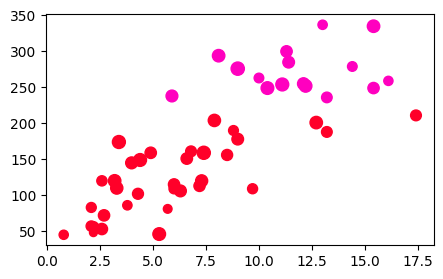

In [23]:
#Using Hierarchical
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="complete")
plt.figure(figsize=(5,3))
plt.scatter(df_crime["Murder"],df_crime["Assault"],df_crime["UrbanPop"],c=cluster.fit_predict(df_crime.iloc[:,[1,2,3]]),cmap=plt.cm.gist_rainbow)

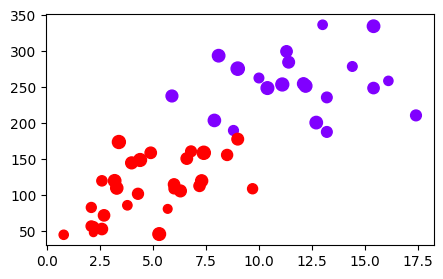

In [27]:
#using KMeans
model = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
model.fit(df_crime.iloc[:,1:4])
plt.figure(figsize=(5,3))
plt.scatter(df_crime["Murder"],df_crime["Assault"],df_crime["UrbanPop"],c=model.labels_,cmap=plt.cm.rainbow)

In [28]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

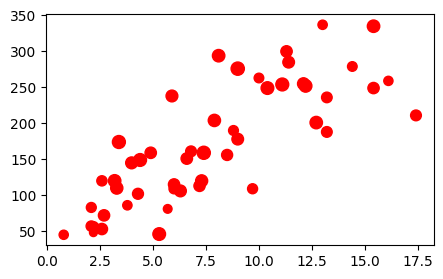

In [29]:
#DBSCAN
dbs=DBSCAN(min_samples=2,eps=0.2)
class_pr=dbs.fit_predict(df_crime.iloc[:,1:5])
plt.figure(figsize=(5,3))
plt.scatter(df_crime["Murder"],df_crime["Assault"],df_crime["UrbanPop"],c=class_pr,cmap=plt.cm.rainbow_r)

### Finding the optimal number of clusters

In [30]:
df1 = pd.read_csv("crime_data.csv")
df1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [31]:
nc = [1,2,3,4,5,6,7,8,9]
iner=[]
for i in nc:
    km=KMeans(i)
    km.fit(df1.iloc[:,[1,2,3,4]])
    iner.append(km.inertia_)

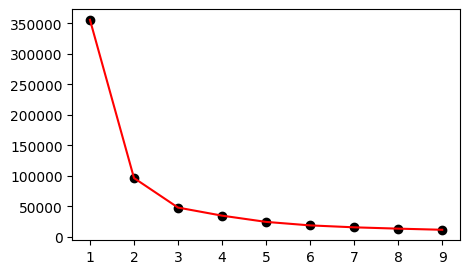

In [32]:
plt.figure(figsize=(5,3))
plt.plot(nc,iner,color="red")
plt.scatter(nc,iner,color="black")
plt.show()

### Silhouette Score

In [33]:
from sklearn.metrics import silhouette_score as sil

In [34]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(df_crime.iloc[:,[1,2,3]])
    sc_score.append(sil(df_crime.iloc[:,[1,2,3]],y))

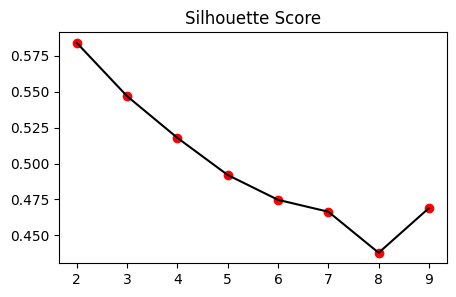

In [35]:
plt.figure(figsize=(5,3))
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.title("Silhouette Score")
plt.show()